# Stochastic Processes

This notebook is primarily intended to serve as my notes for reference, but I've made them available to the public for those eager to learn from a condensed summary. I do not guarantee anything. You use this guide at your own risk, and accept any and all risk and liability for doing so.

## Initial Definitions

`Definition`

A <ins>[random variable](https://en.wikipedia.org/wiki/Random_variable)</ins> is a measurable function $X:\Omega \to E$ from a set of possible outcomes $\Omega$  to a measurable space $E$.

`Definition`

A <ins>[family of sets](https://en.wikipedia.org/wiki/Family_of_sets)</ins> is a collection F of subsets of a given set S.

`Definition`

Let a <ins>stochastic process</ins>, $X(t)$, be a member of a family of random variables $\{X(t) | t \geq 0\}$ indexed by the indexing parameter $t$.

`Definition`

Let a <ins>state</ins>, $x(t)$, be an instantiation of the stochastic process $X(t)$.

`Definition`

Let the set of all instantiations of stochastic process $X(t)$ be called its <ins>state space</ins>.

`Definition`

The set of all possible values of the indexing parameter $t$ is called the <ins>parameter space</ins>.

### Example: The Mandatory Coin Flip Example

Let there be two players, and a fair coin.
Player 1 wins if the coin is comes up heads,
and loses if the coin comes up tails.
The loser gives a dollar to the winner. 
Symmetry implies how Player 2 interacts
with respect to Player 1.
The indexing parameter is the number of coin flips.

Each flip is random variable, which we'll denote $X_i$ for $i = 1 \cdots n$ where $X_i = \pm 1$ is the earnings from that $i$th flip. The expected value and variance are simply

$$E(X_i) = \frac{1}{2}(1)+\frac{1}{2}(-1) = 0$$
$$V(X_i) = \frac{1}{2}+\frac{1}{2} = 1$$

These describe the individual flips, but we'd like to know what to expect in the long term. Since our coin is fair, we can assume that these random variables are independent from each other. A random variable that we might be interested in is the sum of the earnings over time, which can be formulated as the following partial sum

$$S_n = \sum_{i=1}^n X_i$$

and since $S_n$ is itself a random variable we can consider its expected value and variance to be the following.

$$E(S_i) = \sum_{i=1}^n E(X_i) = 0 + 0 \cdots + 0 = 0$$
$$V(S_i) = \sum_{i=1}^n V(X_i) = 1 + 1 \cdots + 1 = n$$

Let's go to a Python-based example to see what this looks like.

Text(200000, -894.4271909999159, '$-2\\sqrt{n}$')

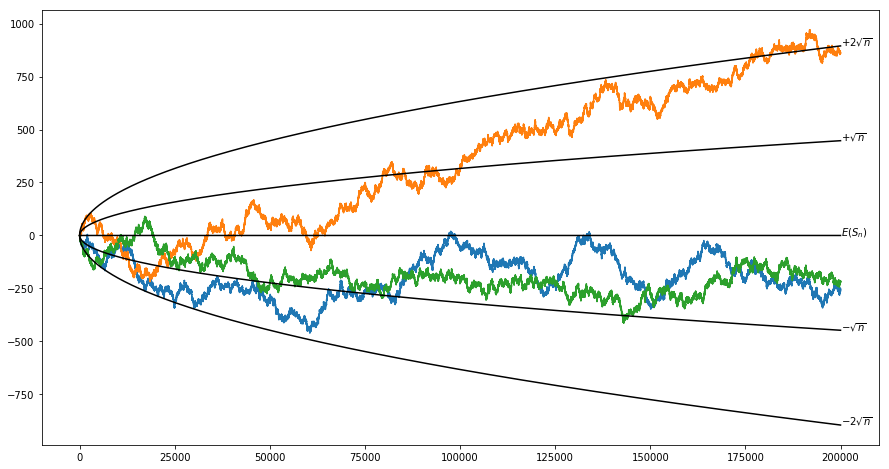

In [45]:
'''
In this example we're going to simulate the coin flipping experiment.
We'll do this three times to show some diversity in the outcomes.
Note that we have short-term time dependence,
but in the long term the sequence can acheive any finite value.
'''

# import some required libraries
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 8]

# Create the dataset
n = 200000 # sample size (sequenc length)
y1 = np.cumsum(np.random.choice([-1, 1], p=[0.5, 0.5], size=n)) # Instantiations of S_n variable via process
y2 = np.cumsum(np.random.choice([-1, 1], p=[0.5, 0.5], size=n)) # Instantiations of S_n variable via process
y3 = np.cumsum(np.random.choice([-1, 1], p=[0.5, 0.5], size=n)) # Instantiations of S_n variable via process
x = np.arange(1, n+1) # index parameter (number of flips)

# Plot data
plt.plot(x,y1) # plot y1
plt.plot(x,y2) # plot y2
plt.plot(x,y3) # plot y3

# Plot theoretical expectation and standard deviations
plt.plot(x,np.zeros(n), color='k') # plot expected value of sequence
plt.plot(x, -np.sqrt(x), color='k') # plot lower 1x standard deviation
plt.plot(x, np.sqrt(x), color='k') # plot lower 1x standard deviation
plt.plot(x, -2*np.sqrt(x), color='k')# plot lower 2x standard deviation
plt.plot(x, 2*np.sqrt(x), color='k')# plot lower 2x standard deviation

# Plot some text to label series
plt.text(n, 0, r'$E(S_n)$')
plt.text(n, np.sqrt(n), r'$+\sqrt{n}$')
plt.text(n, -np.sqrt(n), r'$-\sqrt{n}$')
plt.text(n, 2*np.sqrt(n), r'$+2\sqrt{n}$')
plt.text(n, -2*np.sqrt(n), r'$-2\sqrt{n}$')

## Probability Distributions

`Definition`

<ins>discrete joint probability distribution</ins> of a stochastic process:$P[X(t_i) \leq x_1, X(t_2) \leq x_2, \cdots X(t_n) \leq x_n]$

`Definition`

We can also define the <ins>conditional transition distribution</ins> as $F(x_i, x_{i+k}; t_i, t_{i+k}) = P[X(t_{i+k}) \leq x_{i+k} | X(t_i) = x_i, k \geq 0]$

`Definition`

The <ins>discrete conditional transition distribution</ins> can be written as $P_{i,j}^{m,n} = P(X_n = j | X_m = i, n \geq m)$

`Definition`

A stochastic process $\{X(t), t \in T\}$ is <ins>parameter-homogenous</ins> if the transition distribution function satisfies $F(x_i, x_{i+k}; t_i, t_i + \Delta t) = F(x_i, x_{i+k}; 0, \Delta t)$ $\forall t_i \in T$

## Markov Processes & Renewal Processes

## References

[1] Bhat, U. Narayan. Elements of Applied Stochastic Processes. Computer Science/Operations Research Center, Institute of Technology, Southern Methodist University, Dallas, Texas. John Wiley & Sons, Inc. New York, London, Sydney, Toronto. 1972.